In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# Importing data
path = "" # Put path of your folder of your data if it's not in the same folder
data_train = pd.read_csv(path + "train.csv")
data_train.shape
# (14999, 9)

(14999, 9)

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
datast=data_train[data_train.views=='F']
datast.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
7447,VID_9269,1,F,0,1,0,2013-10-03,PT21M28S,D
8112,VID_9262,1,F,1,0,0,2013-09-18,PT21M6S,D


In [ ]:
data_train.loc[:, ['likes', 'comment','views','dislikes']].value_counts()['F']

comment  views    dislikes
2116     1281217  F           1
2        1616     F           1
         16702    F           1
         2152     F           1
         2276106  F           1
                             ..
0        1183     F           1
         121058   F           1
         131      F           1
         1332     F           1
F        98737    F           1
Length: 155, dtype: int64

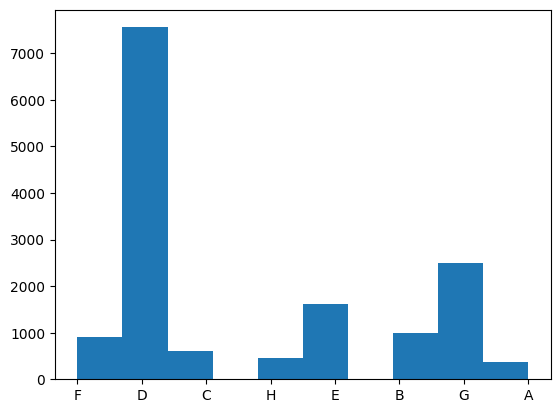

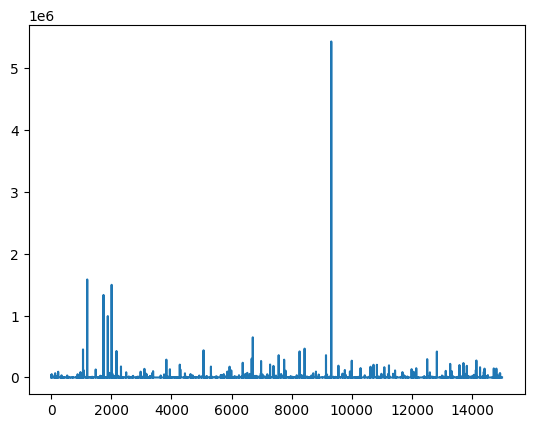

In [ ]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

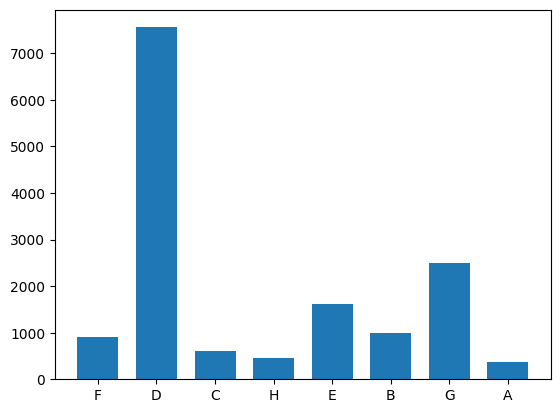

In [ ]:
from matplotlib.pyplot import hist, xticks, show
from numpy import array, linspace
x = np.array(data_train["category"])
nc = len(set(x)) # how many categories
hist(x, bins=nc, rwidth=0.7)
xticks(linspace(0, nc-1, 2*nc+1)[1::2])
show()

In [ ]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

In [ ]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [ ]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:

# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:


# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
        if i not in P:
           mm+=i
        else:
             if(i=="H"):
               h = mm
               mm = ''
             elif(i == "M"):
                 m = mm
                 mm = ''
             else:
                 s = mm
                 mm = ''
  if(h==''):
     h = '00'
  if(m == ''):
       m = '00'
  if(s==''):
       s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
        h, m, s = time_string.split(':')
        return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


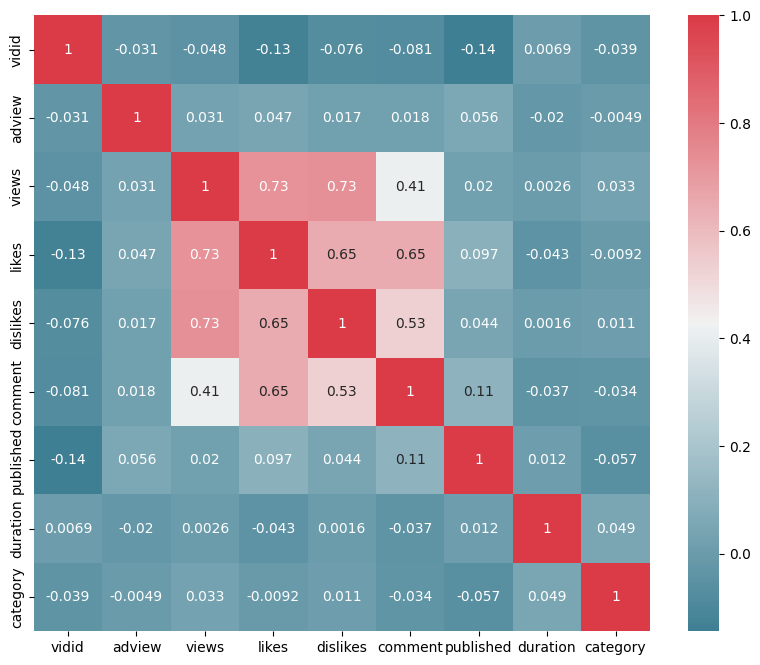

In [ ]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
#drop vidid which is not of any use
data_train=data_train.drop(["vidid"],axis=1)
data_train=data_train.drop(["adview"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

3.8407246808253746e-17

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

Mean Absolute Error: 3521.8592086584704
Mean Squared Error: 830733356.7061487
Root Mean Squared Error: 28822.44536305254


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.8419056285466
Mean Squared Error: 833684117.8768431
Root Mean Squared Error: 28873.588586749018


In [ ]:

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 140
max_depth = 50
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 14832.63968579235
Mean Squared Error: 3517464242.051571
Root Mean Squared Error: 59308.21395094925


<ipython-input-16-108d306c120e>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 6342.102275716856
Mean Squared Error: 798022016.3836097
Root Mean Squared Error: 28249.283466729023


In [ ]:
# lasso Regression
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=1)
lasso_regression.fit(X_train, y_train)
print_error(X_test,y_test, lasso_regression)
# ridge Regression
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=1)
ridge_regression.fit(X_train, y_train)
print_error(X_test,y_test, ridge_regression)


Mean Absolute Error: 3521.003214539922
Mean Squared Error: 830728132.3651066
Root Mean Squared Error: 28822.354733177275
Mean Absolute Error: 3521.7730350611546
Mean Squared Error: 830732678.8714813
Root Mean Squared Error: 28822.433604251415


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense,Dropout
ann = keras.models.Sequential([
Dense(100, activation="relu",
input_shape=X_train.shape[1:]),
Dropout(0.2),
Dense(400,activation="relu"),
Dropout(0.2),
Dense(100,activation="relu"),
Dense(1,activation='linear')
])
optimizer=keras.optimizers.Adam(learning_rate=0.01)
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=20,batch_size=32,validation_split=0.2)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/20
293/293 [==============================] - 1s 3ms/step - loss: 939065984.0000 - mean_squared_error: 939065984.0000 - val_loss: 62954660.0000 - val_mean_squared_error: 62954660.0000
Epoch 2/20
293/293 [==============================] - 1s 2ms/step - loss: 937831296.0000 - mean_squared_error: 937831296.0000 - val_loss: 63284864.0000 - val_mean_squared_error: 63284864.0000
Epoch 3/20
293/293 [==============================] - 1s 2ms/step - loss: 938107328.0000 - mean_squared_error: 938107328.0000 - val_loss: 63167272.0000 - val_mean_squared_error: 63167272.0000
Epoch 4/20
293/293 [==============================] - 1s 2ms/step - loss: 935516416.0000 - mean_squared_error: 935516416.0000 - val_loss: 81370560.0000 - val_mean_squared_error: 81370560.0000
Epoch 5/20
293/293 [==============================] - 1s 3ms/step - loss: 937375488.0000 - mean_squared_error: 937375488.0000 - val_loss: 62959928.0000 - val_mean_squared_error: 62959928.0000
Epoch 6/20
293/293 [====================

In [ ]:
#Saving Scikitlearn models
import pickle
# open a file, where you ant to store the data
file = open('important.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest, file)

# close the file
file.close()

In [ ]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

#Testing

In [ ]:
model=open("important.pkl",'rb')
model1=pickle.load(model)

In [ ]:
import tensorflow
from keras.models import load_model

# load model
model2 = load_model('ann_youtubeadview.h5')
# summarize model.
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               40400     
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               40100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 81,401
Trainable params: 81,401
Non-traina

In [ ]:
# Importing test data
path = "" # Put path of your folder of your data if it's not in the same folder
data_test = pd.read_csv(path + "test.csv")
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
data_test.loc[:, ['likes', 'comment','views','dislikes']].value_counts()['F']

comment  views   dislikes
235      634038  F           1
2        53492   F           1
         88694   F           1
         95026   F           1
         98317   F           1
                            ..
0        24326   F           1
         2166    F           1
         193068  F           1
         10999   F           1
F        93066   F           1
Length: 88, dtype: int64

In [ ]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:

# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [ ]:

# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [ ]:

#drop vidid which is not of any use
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_test=scaler.fit_transform(data_test)
data_test=scaler.fit_transform(data_test)
data_test.mean()

6.530396281403925e-19

In [ ]:
#now predicting with model 1 and 2
def get_pred(X_test, model):
  y_pred=model.predict(X_test)
  return y_pred

In [ ]:
#model1
Y_predicted1=get_pred(data_test, model1)
print(Y_predicted1)

[ 951.17697215  903.06873794   10.82836119 ...   94.722936     34.80012228
 3195.37069675]


In [ ]:
#model2
Y_predicted2=model2.predict(data_test)
print(Y_predicted2)

268/268 [==============================] - 0s 1ms/step
[[1694.4966 ]
 [ 969.19806]
 [ 455.9416 ]
 ...
 [ 704.85956]
 [1354.3768 ]
 [2518.671  ]]


In [ ]:
data = {
    'model1_pred': Y_predicted1,
    'mode2_pred': Y_predicted2.flatten()}
graphshow=pd.DataFrame(data)
graphshow.head()

,model1_pred,mode2_pred
0,951.176972,1694.496582
1,903.068738,969.198059
2,10.828361,455.941589
3,20.522838,4.468764
4,1228.649522,4400.810547


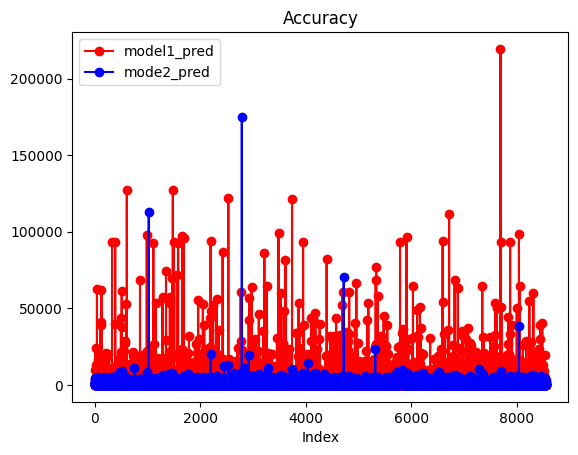

In [ ]:
graphshow.plot(color=['red', 'blue'],label=['a','b'], marker='o') #label=['']

# Add labels and title
plt.xlabel('Index')
#plt.ylabel('Y_predict')
plt.title('Accuracy')

# Add a legend
plt.legend()

# Display the plot
plt.show()